<a href="https://colab.research.google.com/github/Anshg07/Image_generator/blob/main/text_to_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers
!pip install accelerate


In [2]:
import matplotlib.pyplot as plt
from diffusers import AutoPipelineForText2Image, DPMSolverMultistepScheduler
import torch

In [3]:
# Load the model
def load_model():
    pipe = AutoPipelineForText2Image.from_pretrained('lykon/dreamshaper-xl-v2-turbo', torch_dtype=torch.float16, variant="fp16")
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cuda")
    return pipe

In [10]:

# Main function to generate image
def generate_image(prompt):
    pipe = load_model()
    generator = torch.manual_seed(0)
    image = pipe(prompt, num_inference_steps=8, guidance_scale=2).images[0]
    return image


Enter your text prompt: an developer working hard at night on his laptop under lamp light 


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

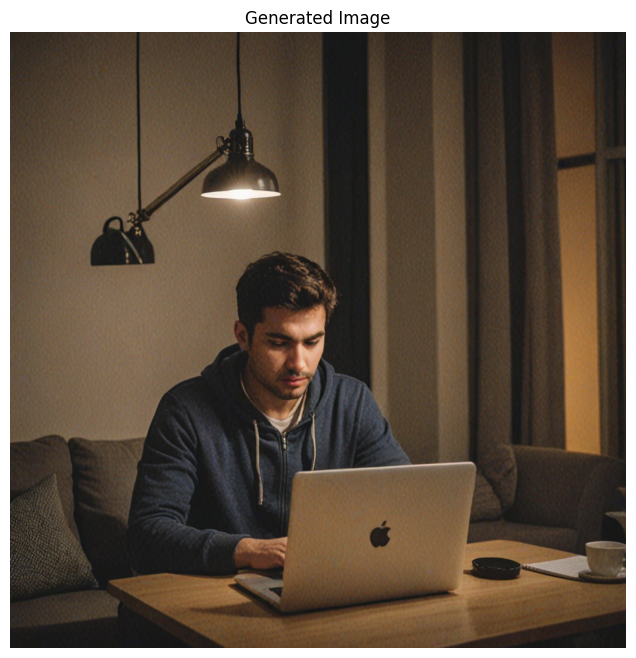

In [11]:
# Generate image
prompt = input("Enter your text prompt: ")  # Prompt input in notebook
image = generate_image(prompt)

# Display the generated image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Generated Image by Ansh Gupta')
plt.show()